## Case Study: Vehicle Advertisements Analysis

In [1]:
## Importing rquired Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                    #for data visualization
import seaborn as sns                              # for data visualization

In [2]:
import os
os.chdir('C:/Users/Kuldeep/Desktop')

## creating dataframe and loading data into it

In [3]:
df=pd.read_csv('vehicles.csv')

In [4]:
 # displaying first five observation 
df.head()  

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [5]:
#show overall strucure of dataframe
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

## Section 1: Price Prediction

##
Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features

# Preprocessing

In [6]:
#checking count of null vakues in columns
df.isna().sum()  

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [7]:
##checking duplicates
df.duplicated().sum()  

0

In [8]:
#dropping unnecessary columns
df = df.drop(df.columns[[0,1,2,3,5,7,11,23]], axis=1)       

In [9]:
df.isna().sum()

title                      0
price                   3811
posted_date                6
deactivation_date          6
category                   0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9050
is_authorized_dealer    9050
is_featured_member      9050
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [10]:
##replacing value for missing vakues in categorical features
from sklearn.impute import SimpleImputer

In [11]:
# Define the imputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to multiple columns
df[['is_member','is_authorized_dealer','is_featured_member']] = imputer.fit_transform(df[['is_member','is_authorized_dealer','is_featured_member']])


In [12]:
df.isna().sum()

title                      0
price                   3811
posted_date                6
deactivation_date          6
category                   0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member                  0
is_authorized_dealer       0
is_featured_member         0
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [13]:
df.head(10)

,title,price,posted_date,deactivation_date,category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator,"Rs 18,000",2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light,"Rs 67,000",2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light,"Rs 85,000",2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board),"Rs 47,000",2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover,"Rs 9,000",2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
5,Toyota Mark two 110 Steering Wheel,"Rs 25,000",2023-02-01T05:44:36+05:30,2022-07-29T12:25:26.000Z,Auto Parts & Accessories,Dehiwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
6,Suzuki Every DA17 Rear Hub axle differential A...,"Rs 65,000",2023-02-01T05:44:24+05:30,2022-07-29T12:17:24.000Z,Auto Parts & Accessories,Dehiwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
7,Honda Fit GE6 Left Side Tail Light,"Rs 15,000",2023-02-01T14:44:45+05:30,2022-07-29T11:52:45.000Z,Auto Parts & Accessories,Dehiwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
8,Nissan March K11 Crystal Fender Left Side,"Rs 7,500",2023-02-27T15:37:59+05:30,2021-12-01T11:30:31.000Z,Auto Parts & Accessories,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",b5bb5408fa4bf4cffd0a51932badbc4a2047c757f3eaaa...
9,Honda Civic Ek3 Fender Liner Cover,"Rs 4,750",2023-01-19T19:44:47+05:30,2022-01-30T09:27:12.000Z,Auto Parts & Accessories,Colombo 10,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'New', 'Part or Accessory Type':...",d1dd34879b807a2da3c7be62aa53a88dc29cbe19d6a879...


In [14]:
# converting price column in numeric format

df['price'] = df['price'].str.replace('Rs ', '').str.replace(',', '')
df['price']

0           18000
1           67000
2           85000
3           47000
4            9000
           ...   
258883    1030000
258884    3550000
258885      70000
258886    7250000
258887     135000
Name: price, Length: 258888, dtype: object

In [15]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [16]:
# Drop rows where 'price' column has missing values
df= df.dropna(subset=['price'])

In [17]:
df

,title,price,posted_date,deactivation_date,category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator,18000.0,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light,67000.0,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light,85000.0,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board),47000.0,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover,9000.0,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989,1030000.0,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009,3550000.0,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent,70000.0,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018,7250000.0,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Cars,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",7c6477247c19fa63845687656fee40702da46c9d184568...


In [18]:
df.isna().sum()

title                   0
price                   0
posted_date             6
deactivation_date       6
category                0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253404 entries, 0 to 258887
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 253404 non-null  object 
 1   price                 253404 non-null  float64
 2   posted_date           253398 non-null  object 
 3   deactivation_date     253398 non-null  object 
 4   category              253404 non-null  object 
 5   location              253404 non-null  object 
 6   geo_region            253404 non-null  object 
 7   area                  253404 non-null  object 
 8   is_delivery_free      253404 non-null  bool   
 9   is_doorstep_delivery  253404 non-null  bool   
 10  is_dsd_applicable     253404 non-null  bool   
 11  is_member             253404 non-null  object 
 12  is_authorized_dealer  253404 non-null  object 
 13  is_featured_member    253404 non-null  object 
 14  is_verified           253404 non-null  bool   
 15  membe

In [20]:
df.head()

,title,price,posted_date,deactivation_date,category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,Nissan Tiida Alternator,18000.0,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light,67000.0,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light,85000.0,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board),47000.0,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover,9000.0,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [21]:
#number of rows and columns
df.shape                             

(253404, 18)

In [22]:
df.columns

Index(['title', 'price', 'posted_date', 'deactivation_date', 'category',
       'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'properties', 'user'],
      dtype='object')

In [23]:
import ast                                 # Used to safely evaluate strings containing Python literal structures (e.g., dictionaries).
            

# Define a function to parse the string and extract 'id' and 'name'
def parse_area(area):
    try:
        # Convert string representation of dictionary to actual dictionary
        area_dict = ast.literal_eval(area)
        # Extract 'id' and 'name' from the dictionary
        return area_dict.get('id'), area_dict.get('name')
    except (ValueError, SyntaxError):
        # Handle cases where the format is incorrect
        return None, None

# Assuming 'df' is your pandas DataFrame
# Ensure the column is of string type
df['area'] = df['area'].astype(str)

# Apply the parse_area function to each row in the 'area' column and create new columns
df[['area_id', 'area_name']] = df['area'].apply(lambda x: pd.Series(parse_area(x)))

# Drop the original 'area' column if needed
df = df.drop(columns=['area'])

# Display the resulting DataFrame
print(df.head())

                            title    price                posted_date  \
0         Nissan Tiida Alternator  18000.0  2023-02-23T23:35:10+05:30   
1             Axio 165 Tail Light  67000.0  2023-02-23T08:32:44+05:30   
2       Axio 165 / 161 Head light  85000.0  2022-12-01T20:27:49+05:30   
3    Vigo side step ( Foot board)  47000.0  2022-12-04T14:47:27+05:30   
4  Vigo Dickey Door Garnish Cover   9000.0  2022-12-08T09:28:04+05:30   

          deactivation_date                  category    location geo_region  \
0  2022-05-30T17:13:04.000Z  Auto Parts & Accessories  Maharagama      LK-11   
1  2022-03-31T16:27:59.000Z  Auto Parts & Accessories       Kotte      LK-11   
2  2022-03-31T14:03:57.000Z  Auto Parts & Accessories       Kotte      LK-11   
3  2022-07-29T13:22:59.000Z  Auto Parts & Accessories     Kottawa      LK-11   
4  2022-07-29T12:55:44.000Z  Auto Parts & Accessories     Kottawa      LK-11   

   is_delivery_free  is_doorstep_delivery  is_dsd_applicable is_member  \
0     

In [24]:
df=df.drop(columns=['area_name'])

In [25]:
#encoding the categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# Apply LabelEncoder to each column individually
for column in ['category','location','geo_region','is_delivery_free', 'is_doorstep_delivery', 'is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','membership_level', 'is_verified','user','title']:
    df[column] = label.fit_transform(df[column])

In [26]:
df


,title,price,posted_date,deactivation_date,category,location,geo_region,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user,area_id
0,65884,18000.0,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,0,127,1,0,0,0,1,0,0,1,2,"{'Condition': 'Reconditioned', 'Part or Access...",52202,1506
1,9692,67000.0,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,0,120,1,0,0,0,1,0,0,1,1,"{'Condition': 'Reconditioned', 'Part or Access...",29427,1506
2,9675,85000.0,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,0,120,1,0,0,0,1,0,0,1,1,"{'Condition': 'Reconditioned', 'Part or Access...",29427,1506
3,107028,47000.0,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,0,119,1,0,0,0,1,0,0,0,1,"{'Condition': 'New', 'Part or Accessory Type':...",31163,1506
4,107001,9000.0,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,0,119,1,0,0,0,1,0,0,0,1,"{'Condition': 'New', 'Part or Accessory Type':...",31163,1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,63299,1030000.0,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,5,93,8,0,0,0,0,0,0,0,0,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",22762,1605
258884,88562,3550000.0,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,5,21,1,0,0,0,0,0,0,0,0,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",63193,1506
258885,55109,70000.0,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,9,40,1,0,0,0,0,0,0,0,0,{'Service type': 'Car Rentals'},62578,1506
258886,101590,7250000.0,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,5,28,1,0,0,0,1,0,0,0,2,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",38988,1506


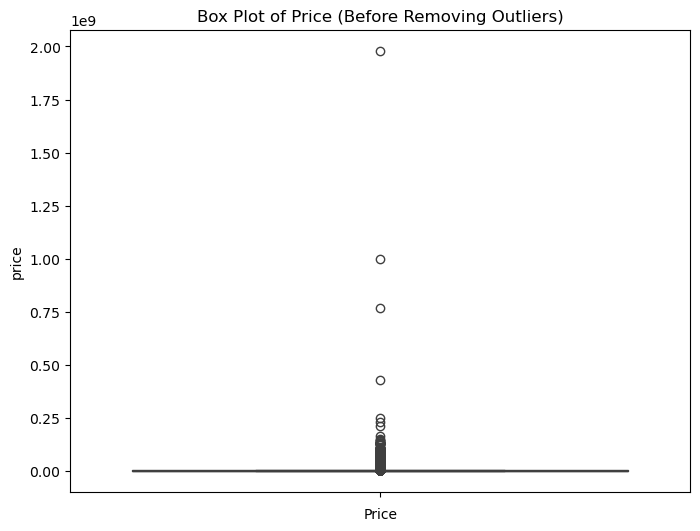

In [27]:
# Plot the box plot of the 'price' column before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['price'])
plt.title('Box Plot of Price (Before Removing Outliers)')
plt.xlabel('Price')
plt.show()

In [28]:
    # Identify and remove outliers
    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

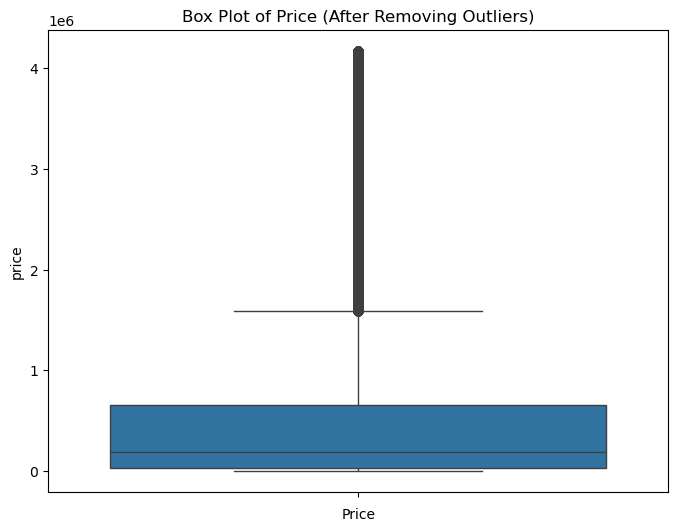

In [29]:
 # Plot the box plot of the 'price' column after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['price'])
plt.title('Box Plot of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.show()

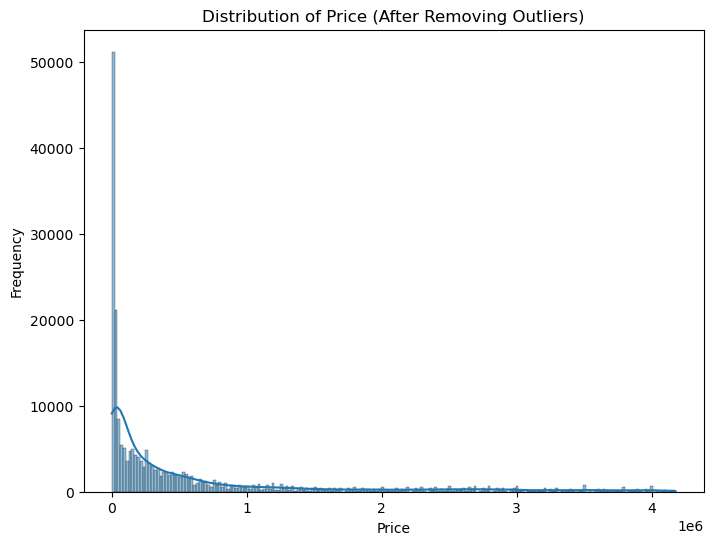

In [30]:
 # Plot the distribution of the 'price' column after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# feature selection

In [31]:
# Function to safely convert string representation of dictionaries to dictionaries
def safe_eval(x):
    try:
        return ast.literal_eval(x)  # Safely evaluate the string to a dictionary
    except (SyntaxError, ValueError):
        return {}  # Return an empty dictionary if evaluation fails

# Apply safe_eval to convert strings to dictionaries, leave dictionaries unchanged
df['properties'] = df['properties'].apply(lambda x: safe_eval(x))

# Initialize set to collect all keys
keys = set()

# Update keys with keys from dictionaries in 'properties' column
df['properties'].apply(lambda x: keys.update(x.keys()))

# Create new columns in DataFrame for each key
for key in keys:
    df[key] = df['properties'].apply(lambda x: x.get(key))

# Drop the original 'properties' column if no longer needed
df.drop(columns=['properties'], inplace=True)

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\4158626533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['properties'] = df['properties'].apply(lambda x: safe_eval(x))
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\4158626533.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df['properties'].apply(lambda x: x.get(key))
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\4158626533.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [32]:

df.columns

Index(['title', 'price', 'posted_date', 'deactivation_date', 'category',
       'location', 'geo_region', 'is_delivery_free', 'is_doorstep_delivery',
       'is_dsd_applicable', 'is_member', 'is_authorized_dealer',
       'is_featured_member', 'is_verified', 'membership_level', 'user',
       'area_id', 'Model', 'Year of Manufacture', 'Part or Accessory Type',
       'Mileage', 'Model year', 'Body type', 'Trim / Edition', 'Brand',
       'Service type', 'Engine capacity', 'Transmission', 'Vehicle Type',
       'Fuel type', 'Bike Type', 'Condition'],
      dtype='object')

In [33]:
 column_take=['price','category','location','geo_region','is_member','is_verified','membership_level',
             'user','area_id']

In [34]:
# # Compute correlation matrix
# corr_matrix = df.corr()

# # Display correlation matrix
# print(corr_matrix)# Compute correlation matrix
# corr_matrix = df.corr()

# # Display correlation matrix
# print(corr_matrix)

# Select numeric columns for correlation computation

# Compute correlation matrix
corr_matrix = df[column_take].corr()

# Display correlation matrix
print(corr_matrix)

                     price  category  location  geo_region  is_member  \
price             1.000000  0.338254 -0.020782    0.110345  -0.256491   
category          0.338254  1.000000 -0.066562    0.204556  -0.381139   
location         -0.020782 -0.066562  1.000000   -0.020198   0.077228   
geo_region        0.110345  0.204556 -0.020198    1.000000  -0.307733   
is_member        -0.256491 -0.381139  0.077228   -0.307733   1.000000   
is_verified      -0.213856 -0.325693  0.087656   -0.235034   0.725250   
membership_level -0.242012 -0.325436  0.073167   -0.298761   0.951891   
user             -0.043179 -0.014391 -0.028012    0.002186   0.047457   
area_id           0.098677  0.197534  0.170057    0.275432  -0.270166   

                  is_verified  membership_level      user   area_id  
price               -0.213856         -0.242012 -0.043179  0.098677  
category            -0.325693         -0.325436 -0.014391  0.197534  
location             0.087656          0.073167 -0.028012  

In [35]:
df.columns

Index(['title', 'price', 'posted_date', 'deactivation_date', 'category',
       'location', 'geo_region', 'is_delivery_free', 'is_doorstep_delivery',
       'is_dsd_applicable', 'is_member', 'is_authorized_dealer',
       'is_featured_member', 'is_verified', 'membership_level', 'user',
       'area_id', 'Model', 'Year of Manufacture', 'Part or Accessory Type',
       'Mileage', 'Model year', 'Body type', 'Trim / Edition', 'Brand',
       'Service type', 'Engine capacity', 'Transmission', 'Vehicle Type',
       'Fuel type', 'Bike Type', 'Condition'],
      dtype='object')

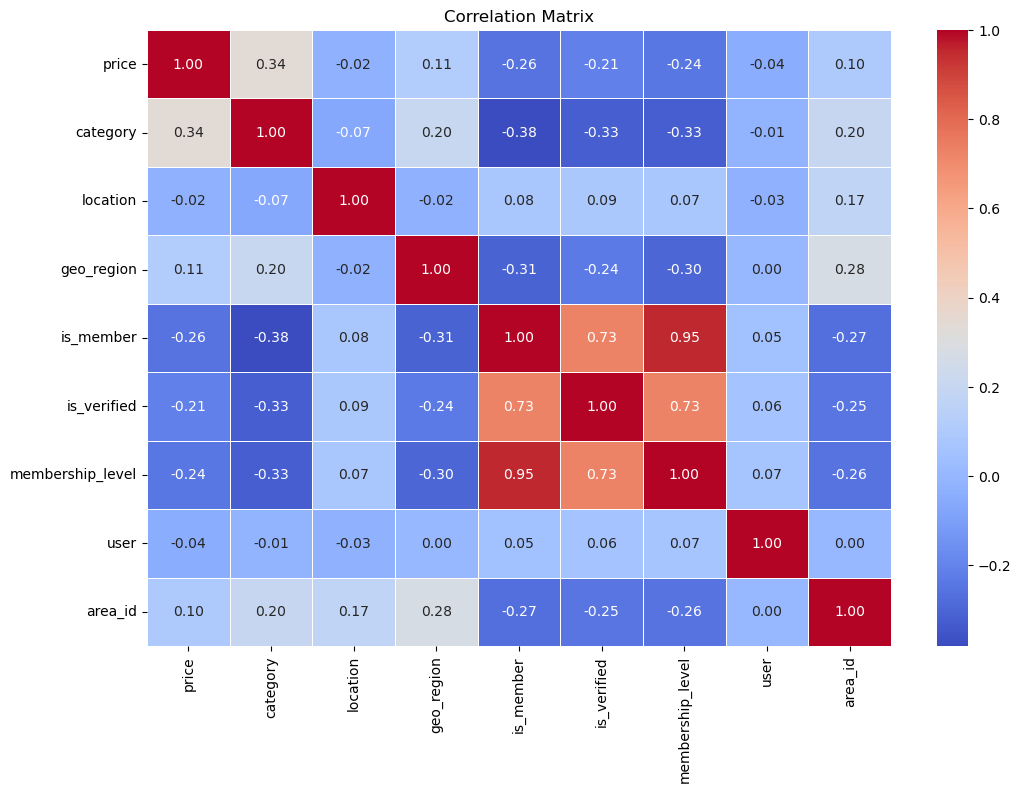

In [36]:
import seaborn as sns
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
df

,title,price,posted_date,deactivation_date,category,location,geo_region,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,...,Body type,Trim / Edition,Brand,Service type,Engine capacity,Transmission,Vehicle Type,Fuel type,Bike Type,Condition
0,65884,18000.0,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,0,127,1,0,0,0,...,None,None,None,None,None,None,None,None,None,Reconditioned
1,9692,67000.0,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,0,120,1,0,0,0,...,None,None,Other brand,None,None,None,None,None,None,Reconditioned
2,9675,85000.0,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,0,120,1,0,0,0,...,None,None,None,None,None,None,None,None,None,Reconditioned
3,107028,47000.0,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,0,119,1,0,0,0,...,None,None,None,None,None,None,None,None,None,New
4,107001,9000.0,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,0,119,1,0,0,0,...,None,None,None,None,None,None,None,None,None,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258882,72024,9999.0,2023-04-01T11:41:50+05:30,2023-05-31T06:11:40.000Z,9,115,2,0,0,0,...,None,None,None,Car Rentals,None,None,None,None,None,None
258883,63299,1030000.0,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,5,93,8,0,0,0,...,Hatchback,K10,Nissan,None,"1,200 cc",Manual,None,Petrol,None,Used
258884,88562,3550000.0,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,5,21,1,0,0,0,...,Saloon,260,Toyota,None,"1,500 cc",Automatic,None,Petrol,None,Used
258885,55109,70000.0,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,9,40,1,0,0,0,...,None,None,None,Car Rentals,None,None,None,None,None,None


In [38]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

# Assuming 'df' is your pandas DataFrame containing the dataset

# Select only numerical columns and drop any rows with missing values
numerical_data = df.select_dtypes(include=['number']).dropna()

# Ensure 'price' column exists and is part of the numerical_data
if 'price' in numerical_data.columns:
    X = numerical_data.drop('price', axis=1)
    y = numerical_data['price']
else:
    raise ValueError("'price' column is not found in the DataFrame")

# Create and fit the RFE model
model = Lasso(alpha=0.1)  # Adjust alpha as needed
rfe = RFE(estimator=model, n_features_to_select=25)  # Adjust the number of features to select
fit = rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % selected_features)

# Now let's ensure 'selected_col' is used properly
selected_col = ['category', 'location', 'geo_region', 'is_member', 'membership_level']

# Assuming you want to use only numerical columns that were selected by RFE:
selected_numerical_features = [feature for feature in selected_features if feature in selected_col]
print("Selected Numerical Features from predefined columns: %s" % selected_numerical_features)

Selected Features: Index(['title', 'category', 'location', 'geo_region', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'user', 'area_id'],
      dtype='object')
Selected Numerical Features from predefined columns: ['category', 'location', 'geo_region', 'is_member', 'membership_level']


In [40]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your pandas DataFrame containing the dataset
# Select only numerical columns and drop any rows with missing values
numerical_data = df.select_dtypes(include=['number']).dropna()

# Ensure 'price' column exists and is part of the numerical_data
if 'price' in numerical_data.columns:
    X = numerical_data.drop('price', axis=1)
    y = numerical_data['price']
else:
    raise ValueError("'price' column is not found in the DataFrame")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RFE model and fit it to the training data
model = Lasso(alpha=0.1)  # Adjust alpha as needed
rfe = RFE(estimator=model, n_features_to_select=15)  # Adjust the number of features to select
rfe.fit(X_train, y_train)

# Transform the data to select only the chosen features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Lasso model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Selected Features: {X.columns[rfe.support_]}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Selected Features: Index(['title', 'category', 'location', 'geo_region', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'user', 'area_id'],
      dtype='object')
Mean Absolute Error: 559685.0066680458
Mean Squared Error: 692257639688.7606
R^2 Score: 0.17808250186274954


In [41]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

# Assuming 'df' is your pandas DataFrame containing the dataset

# Select only numerical columns and drop any rows with missing values
numerical_data = df.select_dtypes(include=['number']).dropna()

# Ensure 'price' column exists and is part of the numerical_data
if 'price' in numerical_data.columns:
    X = numerical_data.drop('price', axis=1)
    y = numerical_data['price']
else:
    raise ValueError("'price' column is not found in the DataFrame")

# Create and fit the RFE model with Ridge Regression
model = Ridge()
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust the number of features to select
fit = rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % selected_features)

Selected Features: Index(['category', 'geo_region', 'is_member', 'is_verified',
       'membership_level'],
      dtype='object')


In [42]:
# Select the features that RFE chose
selected_features = X_train.columns[fit.support_]
print("Selected Features: %s" % selected_features)

# Train the Ridge Regression model on the selected features
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Selected Features: Index(['category', 'geo_region', 'is_member', 'is_verified',
       'membership_level'],
      dtype='object')
Mean Squared Error (MSE): 728616818796.6698
Mean Absolute Error (MAE): 559626.5272990221
R-squared: 0.13491324837479546


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

# Assuming 'df' is your pandas DataFrame containing the dataset

# Select only numerical columns and drop any rows with missing values
numerical_data = df.select_dtypes(include=['number']).dropna()

# Ensure 'price' column exists and is part of the numerical_data
if 'price' in numerical_data.columns:
    X = numerical_data.drop('price', axis=1)
    y = numerical_data['price']
else:
    raise ValueError("'price' column is not found in the DataFrame")

# Create and fit the RFE model with Decision Tree Regressor
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust the number of features to select
fit = rfe.fit(X, y)

# Print the names of the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % selected_features)

Selected Features: Index(['title', 'category', 'location', 'user', 'area_id'], dtype='object')


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your pandas DataFrame containing the dataset

# Select only numerical columns
numerical_data = df.select_dtypes(include=['number'])

# Check for missing values and handle them
if numerical_data.isnull().sum().any():
    # Option 1: Drop rows with missing values
    numerical_data = numerical_data.dropna()

    # Option 2: Fill missing values (e.g., with mean or median)
    # numerical_data = numerical_data.fillna(numerical_data.mean())

# Ensure 'price' column exists and is part of the numerical_data
if 'price' not in numerical_data.columns:
    raise ValueError("'price' column is not found in the DataFrame")

# Split data into features (X) and target (y)
X = numerical_data.drop('price', axis=1)
y = numerical_data['price']

# Initialize the model
model = DecisionTreeRegressor()

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=2)  # Adjust the number of features to select

# Fit RFE
fit = rfe.fit(X, y)

# Print the names of the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % selected_features)

# Fit the model on the selected features
model.fit(X[selected_features], y)

# Make predictions
y_pred = model.predict(X[selected_features])

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Selected Features: Index(['title', 'category'], dtype='object')
Mean Absolute Error: 63860.1298652739
Mean Squared Error: 25714173566.98186
R-squared: 0.9700335269558201


In [45]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is your pandas DataFrame containing the dataset

# Select only numerical columns
numerical_data = df.select_dtypes(include=['number'])

# Check for missing values and handle them
if numerical_data.isnull().sum().any():
    numerical_data = numerical_data.dropna()  # Option 1: Drop rows with missing values
    # numerical_data = numerical_data.fillna(numerical_data.mean())  # Option 2: Fill missing values

# Ensure 'price' column exists and is part of the numerical_data
if 'price' not in numerical_data.columns:
    raise ValueError("'price' column is not found in the DataFrame")

# Split data into features (X) and target (y)
X = numerical_data.drop('price', axis=1)
y = numerical_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust the number of features to select

# Fit RFE on training data
fit = rfe.fit(X_train, y_train)

# Print the names of the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % selected_features)

# Fit the model on the selected features using training data
model.fit(X_train[selected_features], y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model on testing set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Selected Features: Index(['title', 'category', 'location', 'user', 'area_id'], dtype='object')
Mean Absolute Error: 157666.1988849241
Mean Squared Error: 139436469033.65695
R-squared: 0.8344470798057756


## Section 2: User Segmentation

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA



# Select relevant columns
columns_of_interest = ['price', 'category', 'location', 'geo_region', 'is_member',
                       'is_authorized_dealer', 'is_featured_member', 'is_verified',
                       'membership_level', 'user']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_subset_imputed = pd.DataFrame(imputer.fit_transform(df_subset), columns=columns_of_interest)

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_subset_imputed[['category', 'location', 'geo_region',
                                                            'membership_level']])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Concatenate encoded features with the rest of the dataframe
df_encoded = pd.concat([df_subset_imputed.drop(columns=['category', 'location', 'geo_region', 'membership_level']),
                        encoded_features_df], axis=1)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
df_pca = pca.fit_transform(df_scaled)

# Print the shape of the original and reduced data
print(f"Original shape: {df_scaled.shape}")
print(f"Reduced shape: {df_pca.shape}")

# Optionally, create a DataFrame for the PCA components
df_pca_df = pd.DataFrame(df_pca)
print(df_pca_df.head())

Original shape: (216257, 247)
Reduced shape: (216257, 204)
        0         1         2         3         4         5         6    \
0  3.719781 -1.177694  0.014163 -0.029547 -0.100612 -0.042933 -0.055681   
1  3.557142 -1.241978  0.432448 -0.276845 -0.194743  0.259270  0.154072   
2  3.553746 -1.243226  0.434989 -0.272713 -0.194779  0.262172  0.153293   
3  2.790389 -1.283135  0.342992 -0.381979 -0.171060  0.270601  0.143749   
4  2.797558 -1.280500  0.337628 -0.390703 -0.170985  0.264477  0.145393   

        7         8         9    ...       194       195       196       197  \
0 -0.038013 -0.000385  0.032454  ... -0.001653  0.015604 -0.010528  0.001109   
1  0.000773  0.032206 -0.117831  ... -0.039670  0.123758 -0.082676 -0.029524   
2  0.001495  0.032200 -0.117438  ... -0.039654  0.123741 -0.082671 -0.029535   
3  0.007224  0.024899 -0.129776  ... -0.005257  0.005118 -0.003582 -0.000084   
4  0.005699  0.024913 -0.130606  ... -0.005293  0.005155 -0.003593 -0.000059   

        1

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df_encoded is already defined and preprocessed
# Check for NaN or infinite values
if np.any(np.isnan(df_encoded)) or np.any(np.isinf(df_encoded)):
    raise ValueError("The input data contains NaN or infinite values.")

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply PCA with a reduced number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed
df_pca_reduced = pca.fit_transform(df_scaled)

# Check the explained variance ratio
print("Explained Variance Ratio with 5 components: ", pca.explained_variance_ratio_)
print("Number of Components: ", pca.n_components_)

Explained Variance Ratio with 5 components:  [0.02029097 0.00963637 0.00871859 0.00869998 0.00852966 0.00848301
 0.00834079 0.0082804  0.00827579 0.00825861]
Number of Components:  10


In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
# Define the correct range for the number of clusters
range_clusters = range(2, 11)  # Testing for 2 to 10 clusters

# Reduce data size for initial clustering attempts
sample_size = min(10000, df_pca_reduced.shape[0])
df_pca_sample = df_pca_reduced[:sample_size]

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca_sample)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca_sample, cluster_labels))

print("Inertia values for each number of clusters:", inertia)
print("Silhouette scores for each number of clusters:", silhouette_scores)

C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than av

Inertia values for each number of clusters: [36127.40039189745, 21553.99438686065, 18654.56562277046, 18634.268730918127, 13998.389224822562, 15203.179657442375, 13729.723645224436, 11469.969057258331, 12472.70019888508]
Silhouette scores for each number of clusters: [0.6693807688325923, 0.7505587208372665, 0.5978982991277373, 0.26546320101252613, 0.6007857391607974, 0.36588237157786685, 0.3433143936745829, 0.3964236268292973, 0.3468225252775109]


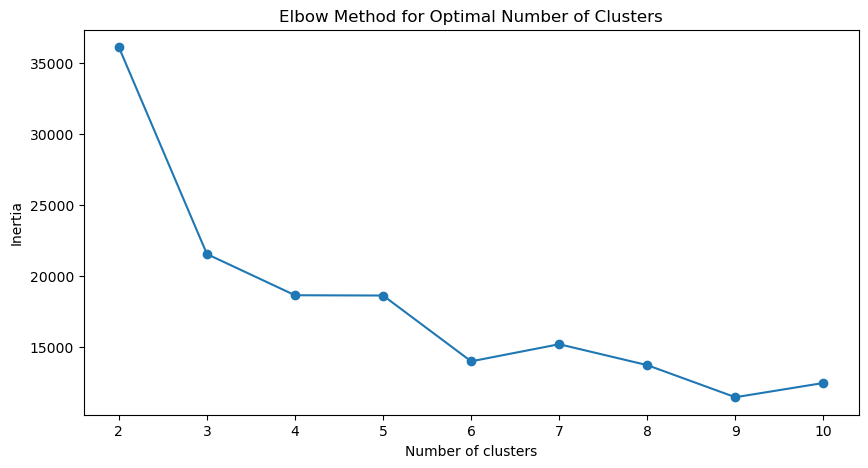

In [50]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

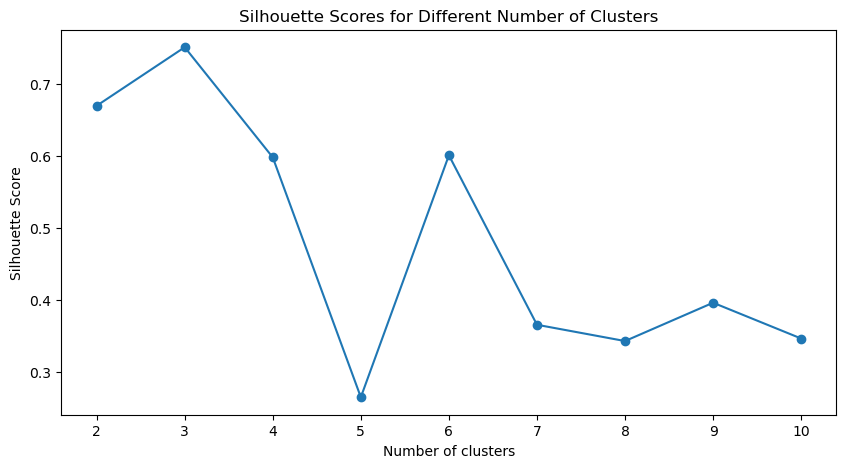

In [51]:
# Plot the Silhouette Scores graph
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\Kuldeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


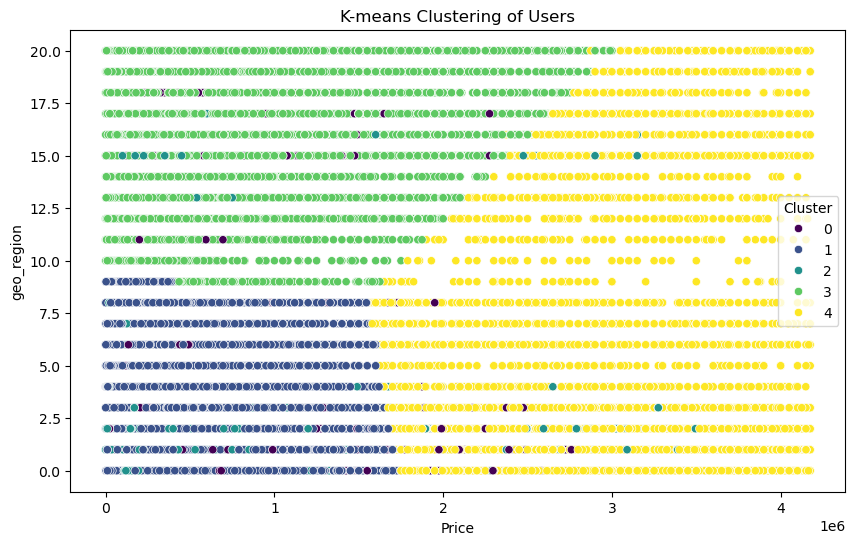

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant numerical features for clustering
features = ['price', 'geo_region', 'is_delivery_free', 'is_doorstep_delivery', 'is_dsd_applicable',
            'is_member', 'is_authorized_dealer', 'is_featured_member', 'is_verified', 'membership_level']

# Ensure all the relevant features are in the DataFrame
for feature in features:
    if feature not in df.columns:
        raise ValueError(f"'{feature}' column is not found in the DataFrame")

# Select the features for clustering and drop any rows with missing values
clustering_data = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(scaled_data)
clustering_data['Cluster'] = kmeans.labels_

# Add the user column back to the clustering data
clustering_data['user'] = df['user'].loc[clustering_data.index]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='geo_region', hue='Cluster', data=clustering_data, palette='viridis')
plt.title('K-means Clustering of Users')
plt.xlabel('Price')
plt.ylabel('geo_region')
plt.legend(title='Cluster')
plt.show()


## Section 3: Geographical Analysis of Demand and Supply

## geographical Analysis

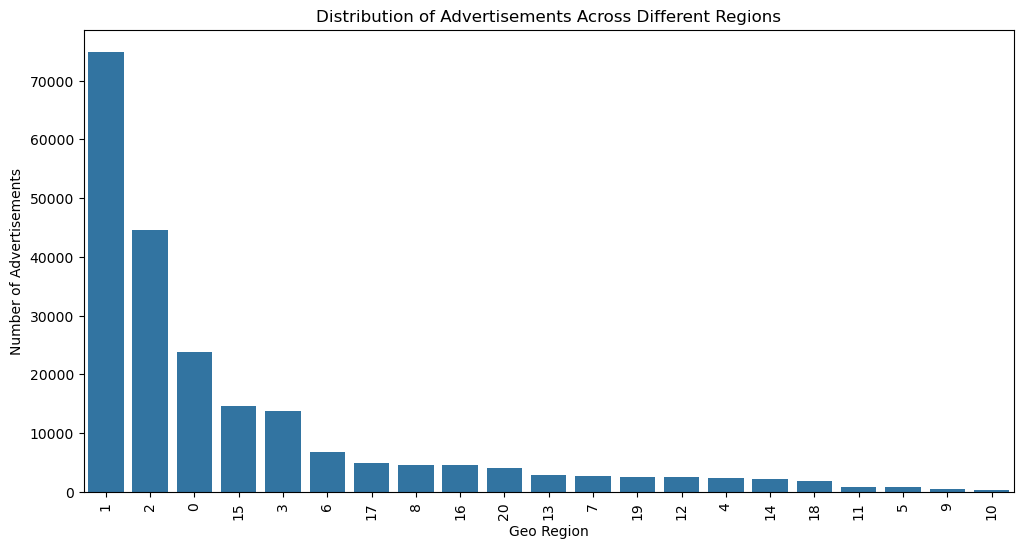

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns



# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Visualize the distribution of advertisements across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_subset, x='geo_region', order=df_subset['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements Across Different Regions')
plt.xlabel('Geo Region')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#This graph is a bar chart showing the distribution of advertisements across different geographical regions. Here's an explanation of the key elements of the graph:
# "Distribution of Advertisements Across Different Regions," indicates that the graph shows how advertisements are distributed across various geographical regions.

#X-Axis (Horizontal): The x-axis represents different geographical regions labeled by numbers (0 to 19).

#Y-Axis (Vertical): The y-axis represents the number of advertisements, with the count ranging from 0 to over 70,000.

#Bars: Each bar corresponds to a specific geographical region and shows the number of advertisements in that region. The height of the bar indicates the number of advertisements.

#Key observations from the graph:

#Region 1 has the highest number of advertisements, with over 70,000.
#Region 2 has the second highest number, with around 45,000 advertisements.
#The number of advertisements decreases significantly as the region number increases.
#Most regions have a relatively low number of advertisements compared to regions 1, 2, and 0.

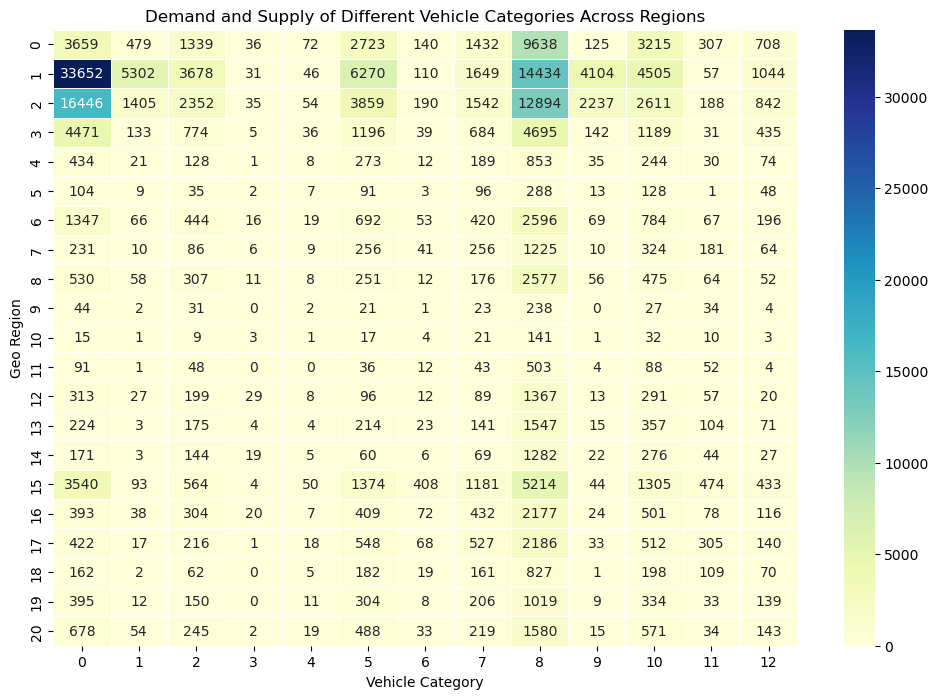

Top regions with the highest number of advertisements:
geo_region
1     74882
2     44655
0     23873
15    14684
3     13830
6      6769
17     4993
8      4577
16     4571
20     4081
Name: count, dtype: int64


In [54]:
# Identify regions with high demand and supply
# Assuming 'category' can be used to identify different types of vehicles
region_demand_supply = df_subset.groupby(['geo_region', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_demand_supply, cmap="YlGnBu", linewidths=.5, annot=True, fmt='d')
plt.title('Demand and Supply of Different Vehicle Categories Across Regions')
plt.xlabel('Vehicle Category')
plt.ylabel('Geo Region')
plt.show()

# Identify top regions with high demand and supply
top_regions = df_subset['geo_region'].value_counts().head(10)
print("Top regions with the highest number of advertisements:")
print(top_regions)

## Temporal Analysis

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\1681494052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posted_date'] = pd.to_datetime(df['posted_date'])
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\1681494052.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['posted_date'].dt.year
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\1681494052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

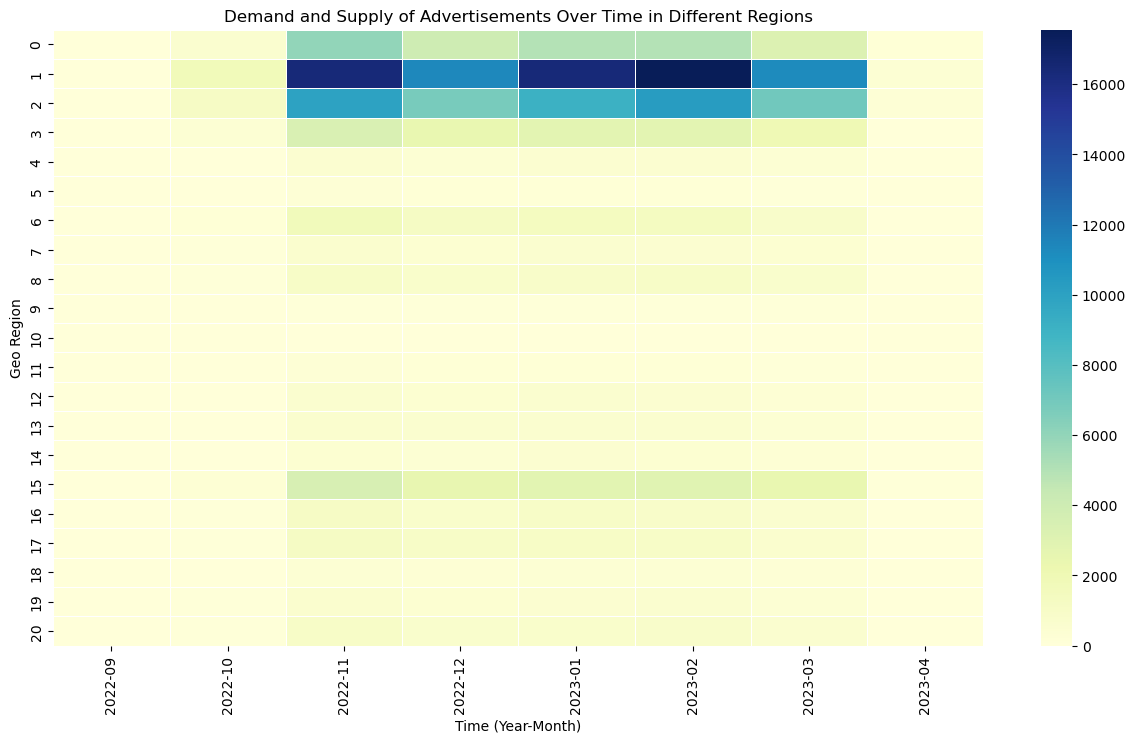

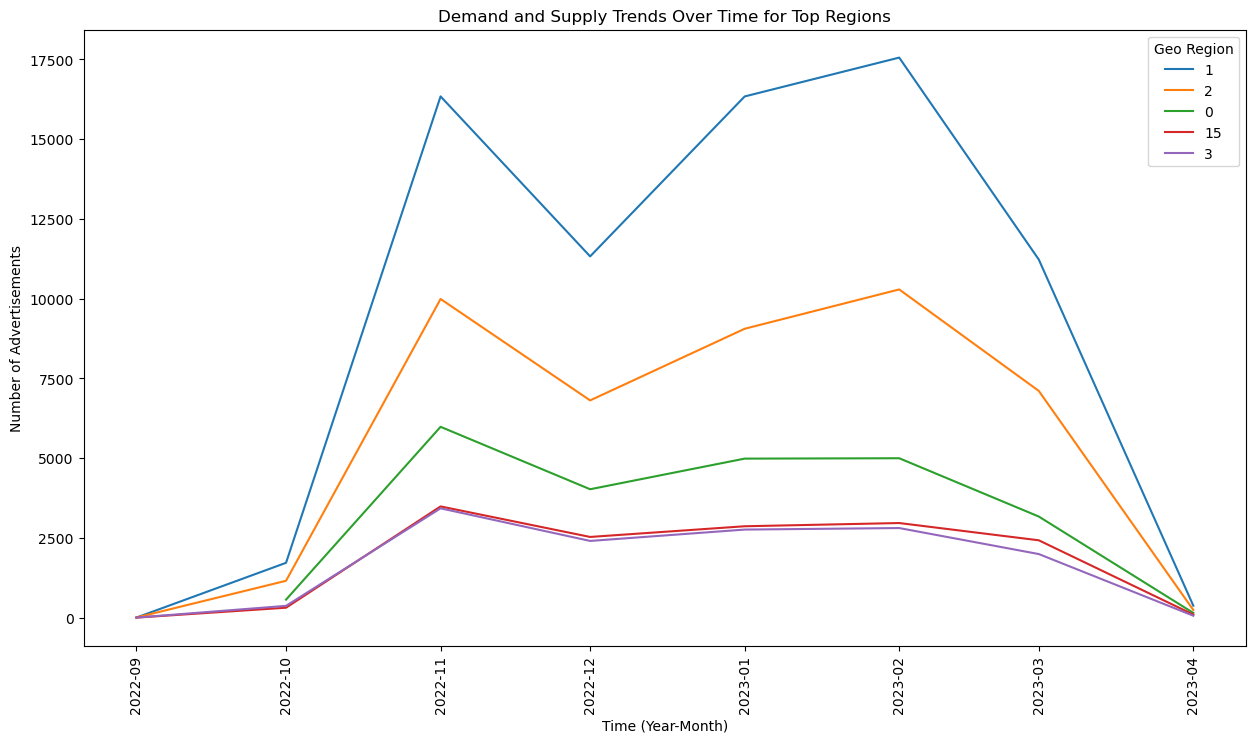

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year and month from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['year_month'] = df['posted_date'].dt.to_period('M')

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'year_month']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'year_month' and 'geo_region' to count the number of advertisements
time_region_demand_supply = df_subset.groupby(['year_month', 'geo_region']).size().unstack(fill_value=0)

# Visualize the demand and supply over time in different regions
plt.figure(figsize=(15, 8))
sns.heatmap(time_region_demand_supply.T, cmap="YlGnBu", linewidths=.5, annot=False)
plt.title('Demand and Supply of Advertisements Over Time in Different Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Geo Region')
plt.xticks(rotation=90)
plt.show()

# Visualize trends for top regions
top_regions = df['geo_region'].value_counts().head(5).index  # Get top 5 regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('year_month').size()
    plt.plot(region_data.index.to_timestamp(), region_data, label=region)

plt.title('Demand and Supply Trends Over Time for Top Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.xticks(rotation=90)
plt.show()

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\418861387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posted_date'] = pd.to_datetime(df['posted_date'])
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\418861387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['posted_date'].dt.year
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\418861387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

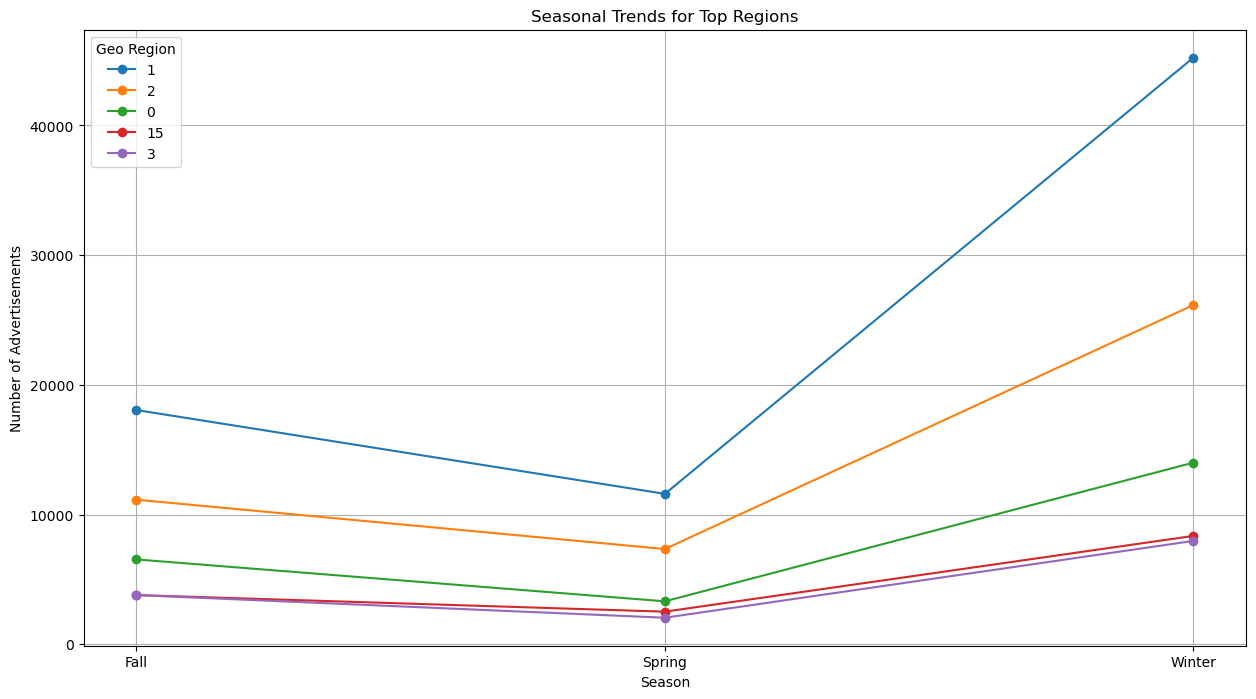

In [56]:

# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month

# Define seasons
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'month' to count the number of advertisements and identify trends
monthly_ads = df_subset.groupby('month').size()



# Group by 'season' to count the number of advertisements and identify seasonal patterns
seasonal_ads = df_subset.groupby('season').size()


# Identify seasonal trends for top regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('season').size()
    plt.plot(region_data.index, region_data, marker='o', label=region)

plt.title('Seasonal Trends for Top Regions')
plt.xlabel('Season')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.grid(True)
plt.show()

## modeling demand and supply

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns for the regression model
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_subset[['category', 'location', 'geo_region', 'season']])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category', 'location', 'geo_region', 'season']))

# Combine the encoded features with the numerical columns
df_encoded = pd.concat([df_subset[['year', 'month']], encoded_features_df], axis=1)

# Create the target variable 'demand_supply'
# Assuming 'demand_supply' is represented by the count of advertisements
df_encoded['demand_supply'] = 1

# Aggregate the data by the features to create the target variable
df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()

# Define the features (X) and the target (y)
X = df_aggregated.drop(columns='demand_supply')
y = df_aggregated['demand_supply']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display first few predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\3142735225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posted_date'] = pd.to_datetime(df['posted_date'])
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\3142735225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['posted_date'].dt.year
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_10688\3142735225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Mean Squared Error: 1557.452686592804
R-squared: 0.1394509691353274
       Actual  Predicted
11402       2  -0.906852
8806        1   3.574420
11586       4  -4.181795
10735       3  -0.339674
10676       1   5.109272


In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Display first few predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Absolute Error (MAE): 16.639310116362676
Mean Squared Error (MSE): 1557.452686592804
Root Mean Squared Error (RMSE): 39.46457508440708
R-squared (R²): 0.1394509691353274
       Actual  Predicted
11402       2  -0.906852
8806        1   3.574420
11586       4  -4.181795
10735       3  -0.339674
10676       1   5.109272
